In [0]:
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Dataset
import torch
from torch import optim, nn
import os
import sys
from PIL import Image, ImageOps
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt
from os import path
import urllib.request
import pdb
from torch.utils import data

root = '/content/dataset'
train_dataset = torchvision.datasets.CIFAR10(root, train=True, transform=None, target_transform=None, download=True)
test_dataset = torchvision.datasets.CIFAR10(root, train=False, transform=None, target_transform=None, download=True)

class Dataset(data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self,dataset):
    'Initialization'
    self.dataset=dataset
  def __len__(self):
    'Denotes the total number of samples'
    return len(self.dataset)
    #return 101
  def __getitem__(self, index):
    'Generates one sample of data'
    # Select sample
    x,label = (self.dataset[index])

    transform=transforms.Compose([transforms.ToTensor()])
    im = transform(x)
    return im, label

train_loader = Dataset(train_dataset)
test_loader = Dataset(test_dataset)
print(torch.cuda.memory_allocated(0)/1e9)
batch_size=250
params={'batch_size':batch_size,'shuffle':True}
training_generator=data.DataLoader(train_loader,**params)
test_generator=data.DataLoader(test_loader,**params)

Files already downloaded and verified
Files already downloaded and verified
0.0


In [0]:
class resnet20(nn.Module):
  def __init__(self,x):
    super(resnet20,self).__init__()
    c=3
    out = 10
    channels=64
    #####Create the first block
    self.conv1=nn.Conv2d(c,channels,(1,1),padding=(0,0))

    #stage1
    self.conv2=nn.Conv2d(channels,channels,(1,1),padding=(0,0))
    self.conv3=nn.Conv2d(channels,channels,(1,1),padding=(0,0))
    self.conv4=nn.Conv2d(channels,channels,(1,1),padding=(0,0))
    self.conv5=nn.Conv2d(channels,channels,(1,1),padding=(0,0))
    self.conv6=nn.Conv2d(channels,channels,(1,1),padding=(0,0))
    self.conv7=nn.Conv2d(channels,channels,(1,1),padding=(0,0))
    #stage2
    self.conv8=nn.Conv2d(channels*2,channels*2,(1,1),padding=(0,0))
    self.conv9=nn.Conv2d(channels*2,channels*2,(1,1),padding=(0,0))
    self.conv10=nn.Conv2d(channels*2,channels*2,(1,1),padding=(0,0))
    self.conv11=nn.Conv2d(channels*2,channels*2,(1,1),padding=(0,0))
    self.conv12=nn.Conv2d(channels*2,channels*2,(1,1),padding=(0,0))
    self.conv13=nn.Conv2d(channels*2,channels*2,(1,1),padding=(0,0))
    self.conv14=nn.Conv2d(channels*2,channels*2,(1,1),padding=(0,0))
    self.conv15=nn.Conv2d(channels*2,channels*2,(1,1),padding=(0,0))
    self.conv16=nn.Conv2d(channels*2,channels*2,(1,1),padding=(0,0))
    #stage3
    self.conv17=nn.Conv2d(channels*4,channels*4,(1,1),padding=(0,0))
    self.conv18=nn.Conv2d(channels*4,channels*4,(1,1),padding=(0,0))
    self.conv19=nn.Conv2d(channels*4,channels*4,(1,1),padding=(0,0))
    self.conv20=nn.Conv2d(channels*4,channels*4,(1,1),padding=(0,0))
    self.conv21=nn.Conv2d(channels*4,channels*4,(1,1),padding=(0,0))
    self.conv22=nn.Conv2d(channels*4,channels*4,(1,1),padding=(0,0))
    self.conv23=nn.Conv2d(channels*4,channels*4,(1,1),padding=(0,0))
    self.conv24=nn.Conv2d(channels*4,channels*4,(1,1),padding=(0,0))
    self.conv25=nn.Conv2d(channels*4,channels*4,(1,1),padding=(0,0))
    self.conv26=nn.Conv2d(channels*4,channels*4,(1,1),padding=(0,0))
    self.conv27=nn.Conv2d(channels*4,channels*4,(1,1),padding=(0,0))
    #stage4
    self.conv28=nn.Conv2d(channels*8,channels*8,(1,1),padding=(0,0))
    self.conv29=nn.Conv2d(channels*8,channels*8,(1,1),padding=(0,0))
    self.conv30=nn.Conv2d(channels*8,channels*8,(1,1),padding=(0,0))
    self.conv31=nn.Conv2d(channels*8,channels*8,(1,1),padding=(0,0))
    self.conv32=nn.Conv2d(channels*8,channels*8,(1,1),padding=(0,0))
    self.conv33=nn.Conv2d(channels*8,channels*8,(1,1),padding=(0,0))
    self.conv34=nn.Conv2d(channels*8,channels*8,(1,1),padding=(0,0))
    self.conv35=nn.Conv2d(channels*8,channels*8,(1,1),padding=(0,0))
    self.conv36=nn.Conv2d(channels*8,channels*8,(1,1),padding=(0,0))


    self.convtrans1=nn.Conv2d(channels,channels*2,kernel_size=(2,2),stride=2,padding=(0,0))
    self.convtrans2=nn.Conv2d(channels*2,channels*4,(2,2),stride=2,padding=(0,0))
    self.convtrans3=nn.Conv2d(channels*4,channels*8,(2,2),stride=2,padding=(0,0))
    
    self.bn1=nn.BatchNorm2d(channels)
    self.bn2=nn.BatchNorm2d(channels*2)
    self.bn3=nn.BatchNorm2d(channels*4)
    self.bn4=nn.BatchNorm2d(channels*8)
    self.activation = nn.ReLU()
    self.m1=nn.AvgPool2d(1,1)
    self.fc=nn.Linear(8192,10)


  
  def forward(self,x):
    n,c,h,w = x.size()
    #3 channels

    o1=self.activation(self.bn1(self.conv1(x)))

    #32 channels - stage 1
    
    #stage=1

    #block1=block(o1,stage)

    o2=self.activation(self.bn1(self.conv2(o1)))
    o3=self.conv3(o2)
    o4=in1 + o3
    o5 = self.activation(self.bn1(o4))

    #block2=block(block1,stage)

    o6=self.activation(self.bn1(self.conv4(o5)))
    o7=self.conv5(o6)
    o8=o5 + o7
    o9 = self.activation(self.bn1(o8))

    #block3=block(block2,stage)

    o10=self.activation(self.bn1(self.conv6(o9)))
    o11=self.conv7(o10)
    o12=o9 + o11
    o13 = self.activation(self.bn1(o12))

    #32 channels
    #stage+=0.5

    #block5=block(block3,stage)

    o14=(self.convtrans1(o13))
    o15=self.activation(self.bn2(o14))
    o16=self.conv8(o15)
    o17=o14+o16
    o18=self.activation(self.bn2(o17))

    #64 channels - stage 2

    #stage+=0.5
    
    #block6=block(block5,stage)

    o19=self.activation(self.bn2(self.conv9(o18)))
    o20=self.conv10(o19)
    o21=o18 + o20
    o22 = self.activation(self.bn2(o21))

    #block7=block(block6,stage)

    o23=self.activation(self.bn2(self.conv11(o22)))
    o24=self.conv12(o23)
    o25=o22 + o24
    o26 = self.activation(self.bn2(o25))

    #block8=block(block7,stage)

    o27=self.activation(self.bn2(self.conv13(o26)))
    o28=self.conv14(o27)
    o29=o26 + o28
    o30 = self.activation(self.bn2(o29))

    #block8_5=block(block8,stage)

    o31=self.activation(self.bn2(self.conv15(o30)))
    o32=self.conv16(o31)
    o33=o30 + o32
    o34 = self.activation(self.bn2(o33))

    #64 channels
    
    #stage+=0.5

    #block9=block(block8_5,stage)

    o35=(self.convtrans2(o34))
    o36=self.activation(self.bn2(o35))
    o37=self.conv17(o36)
    o38=o37+o35
    o39=self.activation(self.bn2(o38))

    #128 channels - stage 3
    #stage+=0.5
    
    #block10=block(block9,stage)

    o40=self.activation(self.bn3(self.conv18(o39)))
    o41=self.conv19(o40)
    o42=o39 + o41
    o43 = self.activation(self.bn3(o42))

    #block11=block(block10,stage)

    o44=self.activation(self.bn3(self.conv20(o43)))
    o45=self.conv21(o44)
    o46=o43 + o45
    o47 = self.activation(self.bn3(o46))

    #block12=block(block11,stage)

    o48=self.activation(self.bn3(self.conv22(o47)))
    o49=self.conv23(o48)
    o50=o47 + o49
    o51 = self.activation(self.bn3(o50))

    #block13=block(block12,stage)

    o52=self.activation(self.bn3(self.conv24(o51)))
    o53=self.conv25(o52)
    o54=o51 + o53
    o55 = self.activation(self.bn3(o54))

    #block14=block(block13,stage)

    o56=self.activation(self.bn3(self.conv26(o55)))
    o57=self.conv27(o56)
    o58=o55 + o57
    o59 = self.activation(self.bn3(o58))

    #128 channels 

    #stage+=0.5

    #block15=block(block14,stage)

    o60=(self.convtrans3(o59))
    o61=self.activation(self.bn2(o60))
    o62=self.conv28(o61)
    o63=o60+o62
    o64=self.activation(self.bn2(o63))

    #256 channels - stage 4
    #stage+=0.5
    
    #block17=block(block15,stage)

    o65=self.activation(self.bn4(self.conv29(o64)))
    o66=self.conv30(o65)
    o67=o64 + o66
    o68 = self.activation(self.bn4(o4))

    #block18=block(block17,stage)

    o69=self.activation(self.bn4(self.conv31(o68)))
    o70=self.conv32(o69)
    o71=o68 + o70
    o72 = self.activation(self.bn4(o71))

    #block19=block(block18,stage)

    o73=self.activation(self.bn4(self.conv33(o72)))
    o74=self.conv34(o73)
    o75=o72 + o74
    o76 = self.activation(self.bn4(o75))

    #block20=self.m1(block(block19,stage))

    o77=self.activation(self.bn4(self.conv35(o76)))
    o78=self.conv36(o77)
    o79=o76 + o78
    o80 = self.activation(self.bn4(o79))

    #256 channels
    #fc 
    n,c,h,w=block20.size()

    vector = block20.view(n,c*h*w)

    out = (self.fc(vector))

    return out


for image,label in training_generator:
  model=resnet20(image.cuda())
  model=model.cuda()
  break

for thing in model.named_parameters():
  if isinstance(thing,nn.Conv2d):
    torch.nn.init.xavier_uniform_(thing.weight)

#define the objective function
objective = torch.nn.CrossEntropyLoss()

#define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)

 84%|████████▍ | 201/240.0 [00:33<00:32,  1.21it/s]

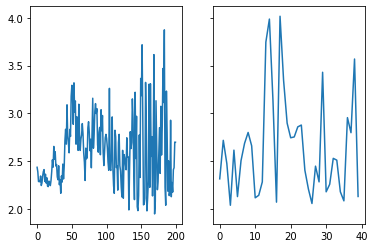

 84%|████████▍ | 201/240.0 [00:33<00:31,  1.22it/s]

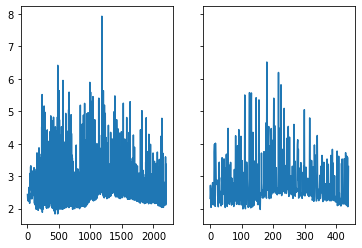

 84%|████████▍ | 201/240.0 [00:33<00:32,  1.22it/s]

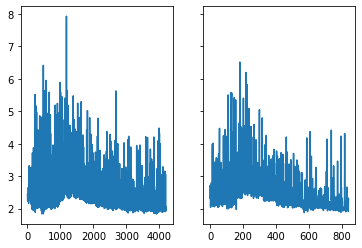

 84%|████████▍ | 201/240.0 [00:33<00:32,  1.22it/s]

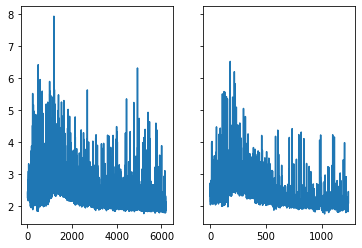

 84%|████████▍ | 201/240.0 [00:33<00:32,  1.21it/s]

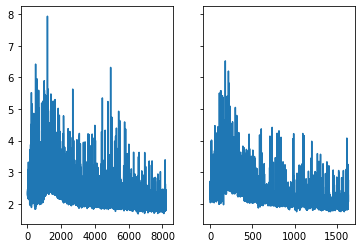

 84%|████████▍ | 201/240.0 [00:33<00:32,  1.21it/s]

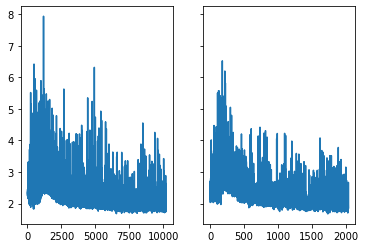

 13%|█▎        | 31/240.0 [00:04<00:31,  6.56it/s]

In [0]:
loss_train = []
loss_valid = []
from tqdm import tqdm
epochs=1000

for epoch in range(epochs):
  
  loop = tqdm(total=(len(training_generator.dataset)/training_generator.batch_size)+(len(test_generator.dataset)/test_generator.batch_size), position = 0)
  for image,label in training_generator:
    yhat = model(image.cuda())
    loss=objective(yhat,label.cuda())
    try:
      loss.backward()
      optimizer.step()
      loss_train.append(loss.item())
      #print("train: " + str(loss))
    except:
      print('end of batch')
      loop.update(1)
    loop.update(1)
  with torch.no_grad():
    for image,label in test_generator:
      yhat = model(image.cuda())
      loss=objective(yhat,label.cuda())
      loss_valid.append(loss.item())  
    loop.update(1)   
  if epoch%10==0:
    fig,(ax1,ax2) = plt.subplots(1,2,sharey=True)
    ax1.plot(loss_train)
    ax2.plot(loss_valid)
    plt.pause(0.5)
    plt.show()
  

In [0]:
loss.item()